In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys
import os
import seaborn as sns
import pandas as pd
sns.set_style('white')

## Import functions from figure_template

In [14]:
if '../scripts' not in sys.path:
    sys.path.append('../scripts')
from importlib import reload
import figure_template
# force reload of the module
reload(figure_template)
from figure_template import *

## Figure download button

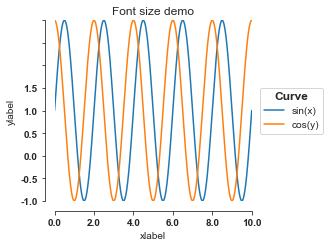

In [4]:
plot_demo()
download_figure('demo.pdf')

## Embed PDF figure

In [5]:
plot_demo()
embed_pdf_figure(title='Demo')

## Embed PDF with multiple pages

In [6]:
with embed_pdf_pages(title='PDF with multiple pages') as pdf:
    for T in range(1, 5):
        fig, ax = plt.subplots()
        x = np.linspace(0, 10, 1000)
        y = np.sin(2*np.pi*x)
        ax.plot(x, y)
        pdf.savefig(fig)
        plt.close()

## DataFrame download

### Download link

In [7]:
df = pd.DataFrame(np.random.uniform(size=(5, 4)), columns=list('ABCD'))
display_dataframe(df, filename="dataframe")

,A,B,C,D
0,0.554257,0.578461,0.600238,0.221746
1,0.235548,0.116750,0.467145,0.323914
2,0.145201,0.490895,0.249627,0.841717
3,0.000866,0.854923,0.509836,0.525301
4,0.253534,0.252205,0.177532,0.468709


### Download button

In [8]:
df = pd.DataFrame(np.random.uniform(size=(5, 4)), columns=list('ABCD'))
display_dataframe(df, filename="dataframe", type='hyperlink')

,A,B,C,D
0,0.171042,0.837789,0.437408,0.519328
1,0.353550,0.999351,0.480029,0.374395
2,0.710914,0.185165,0.518855,0.446665
3,0.420940,0.562580,0.800564,0.380836
4,0.763301,0.983795,0.909913,0.055776


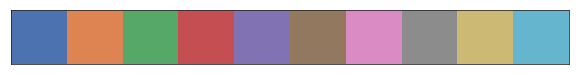

In [9]:
sns.palplot(sns.color_palette('deep', 10))

In [5]:
from contextlib import contextmanager
from IPython.display import HTML, display, FileLink
from base64 import b64encode, b64decode
from io import StringIO, BytesIO
from wand.image import Image as WImage
from wand.display import display as wdisplay
from matplotlib.ticker import FixedFormatter, AutoLocator, AutoMinorLocator, MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from contextlib import contextmanager

@contextmanager
def embed_pdf_data(width=640, height=480, title='Image'):
    try:
        data = BytesIO()
        yield data
    finally:
        data = data.getvalue()

        data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
        display(HTML('<object width="{}" height="{}" data="{}"></object>'.format(width, height, data)))
        plt.close()

In [6]:
m = pd.DataFrame(np.random.normal(size=(100, 100)))
m.index = ['{:050d}'.format(i) for i in range(m.shape[0])]
with embed_pdf_data(title='Clustermap') as data:
    g = sns.clustermap(m)
    g.savefig(data, format='pdf')